Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

Reading Dataset

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Fining Missing Embarked

In [4]:
df.loc[df.Embarked.isnull(),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [5]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [6]:
df.loc[df.Embarked.isnull(),'Embarked'] = 'C'

For finding missing ages we can cluster our data and the use the mean or median of age in each cluster for filling missed ones

Selecting Feautures

In [7]:
X = df.loc[:,['Pclass','Sex','SibSp','Parch','Fare','Embarked']].copy()
X

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,1,0,7.2500,S
1,1,female,1,0,71.2833,C
2,3,female,0,0,7.9250,S
3,1,female,1,0,53.1000,S
4,3,male,0,0,8.0500,S
...,...,...,...,...,...,...
886,2,male,0,0,13.0000,S
887,1,female,0,0,30.0000,S
888,3,female,1,2,23.4500,S
889,1,male,0,0,30.0000,C


Encoding Categorical Variables

1) Sex:Lable Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.loc[:,'Sex'] = le.fit_transform(X.loc[:,'Sex'])
X.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,1,1,0,7.2500,S
1,1,0,1,0,71.2833,C
2,3,0,0,0,7.9250,S
3,1,0,1,0,53.1000,S
4,3,1,0,0,8.0500,S


2. Embarked

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[-1])],remainder='passthrough')
X = ct.fit_transform(X)

Clustering Phase

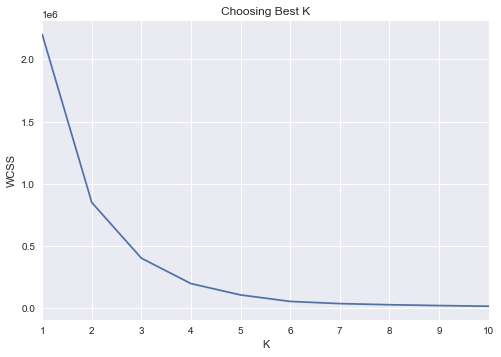

In [10]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=666)
    kmean.fit(X)
    wcss.append(kmean.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Choosing Best K')
plt.xlabel('K')
plt.xlim(1,10)
plt.ylabel('WCSS')
plt.show()

In [11]:
kmean = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=666)
y_kmeans = kmean.fit_predict(X)
df['Cluster'] = y_kmeans
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cluster
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


(array([ 50.,  37., 144., 143.,  89.,  53.,  26.,  16.,   6.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

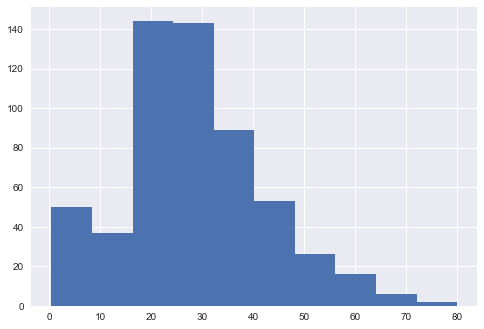

In [12]:
plt.hist(df.loc[df.Cluster==0,'Age'])

In [13]:
#Because of its kurtios we use median
med_1 = df.loc[df.Cluster==0,'Age'].median()
med_2 = df.loc[df.Cluster==1,'Age'].median()
med_3 = df.loc[df.Cluster==2,'Age'].median()
med_1,med_2,med_3

(27.5, 34.0, 27.0)

In [14]:
df.loc[(df.loc[df.Age.isnull(),'Cluster'] == 0).index,'Age'] = med_1
df.loc[(df.loc[df.Age.isnull(),'Cluster'] == 1).index,'Age'] = med_2
df.loc[(df.loc[df.Age.isnull(),'Cluster'] == 2).index,'Age'] = med_3

In [15]:
df.to_csv('c_train.csv',index=False)

Now Test Set

In [16]:
df = pd.read_csv("test.csv")
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
df.isna().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
df[df.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [19]:
df.loc[df.Fare.isna(),'Fare'] = df.Fare.mean()

In [20]:
X = df.loc[:,['Pclass','Sex','SibSp','Parch','Fare','Embarked']].copy()
X

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,0,0,7.8292,Q
1,3,female,1,0,7.0000,S
2,2,male,0,0,9.6875,Q
3,3,male,0,0,8.6625,S
4,3,female,1,1,12.2875,S
...,...,...,...,...,...,...
413,3,male,0,0,8.0500,S
414,1,female,0,0,108.9000,C
415,3,male,0,0,7.2500,S
416,3,male,0,0,8.0500,S


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.loc[:,'Sex'] = le.fit_transform(X.loc[:,'Sex'])
X.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,1,0,0,7.8292,Q
1,3,0,1,0,7.0000,S
2,2,1,0,0,9.6875,Q
3,3,1,0,0,8.6625,S
4,3,0,1,1,12.2875,S


In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[-1])],remainder='passthrough')
X = ct.fit_transform(X)

D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


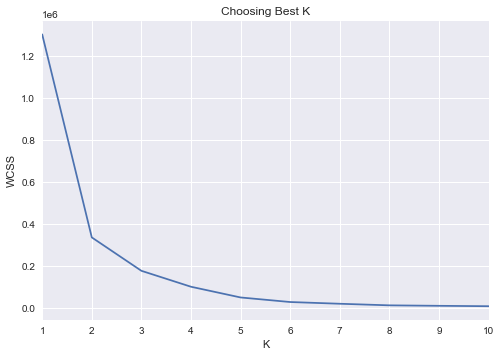

In [23]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=666)
    kmean.fit(X)
    wcss.append(kmean.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Choosing Best K')
plt.xlabel('K')
plt.xlim(1,10)
plt.ylabel('WCSS')
plt.show()

In [24]:
kmean = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=666)
y_kmeans = kmean.fit_predict(X)
df['Cluster'] = y_kmeans
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cluster
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [25]:
set(df.loc[df.Age.isnull(),'Cluster'])

{0, 2}

In [26]:
#Because of its kurtios we use median
med_1 = df.loc[df.Cluster==0,'Age'].median()
med_3 = df.loc[df.Cluster==2,'Age'].median()
med_1,med_3

(26.0, 38.0)

In [27]:
df.loc[(df.loc[df.Age.isnull(),'Cluster'] == 0).index,'Age'] = med_1
df.loc[(df.loc[df.Age.isnull(),'Cluster'] == 2).index,'Age'] = med_3

In [28]:
df.to_csv('c_test.csv',index=False)